# 0.0. BUSINESS

|Description | Feature Type | Feature | Data Type |
|---|---|---|---|
|Age | Objective Feature | age | int (days)|
|Height | Objective Feature | height | int (cm) |
|Weight | Objective Feature | weight | float (kg) |
|Gender | Objective Feature | gender | categorical code |
|Systolic blood pressure | Examination Feature | ap_hi | int |
|Diastolic blood pressure | Examination Feature | ap_lo | int |
|Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
|Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
|Smoking | Subjective Feature | smoke | binary |
|Alcohol intake | Subjective Feature | alco | binary |
|Physical activity | Subjective Feature | active | binary |
|Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

for binary data:
1: Positive/ 0: Negative

## 1.0. IMPORTS

In [46]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

import seaborn as sns

## 1.1. Helper Functions

In [71]:
def jupyter_settings():
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    sns.set()

In [72]:
jupyter_settings()

## 1.2. Import Data

In [73]:
df1 = pd.read_csv('data/cardio_train.csv', sep=';', index_col= 'id')

In [74]:
df1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# 2.0. DATA DESCRIPTION

In [75]:
df2 = df1.copy()

## 2.1. Data Dimension

In [76]:
print('Number of rows: {}'.format(df2.shape[0]))
print('Number of columns: {}'.format(df2.shape[1]))

Number of rows: 70000
Number of columns: 12


## 2.2. Changings

In [77]:
# Changing the name of columns ap_hi, ap_lo, gluc and alco
df2.rename({'ap_hi': 'p_systolic', 'ap_lo': 'p_diastolic', 'gluc': 'glucose', 'alco': 'alcohol'}, axis=1, inplace=True)

In [78]:
# Changing Age Scale of days to years (rounding)
df2['age'] = round(df2['age']/365).astype(int) #rounding age

## 2.2. Data Types

In [79]:
df2.dtypes

age              int64
gender           int64
height           int64
weight         float64
p_systolic       int64
p_diastolic      int64
cholesterol      int64
glucose          int64
smoke            int64
alcohol          int64
active           int64
cardio           int64
dtype: object

## 2.3. Check NA

In [80]:
df2.isna().sum()

age            0
gender         0
height         0
weight         0
p_systolic     0
p_diastolic    0
cholesterol    0
glucose        0
smoke          0
alcohol        0
active         0
cardio         0
dtype: int64

The data no have missing Data

## 2.4. Statistical Description - With Outliers

In [99]:
stats_describe = df2.describe().T
stats_describe['range'] = df2.apply(lambda x: x.max() - x.min()) # add range to describe
stats_describe['skew'] = df2.apply( lambda x: x.skew()) # add skew to describe
stats_describe['kurtosis'] = df2.apply( lambda x: x.kurtosis()) # add kurtosis to describe

stats_describe

,count,mean,std,min,25%,50%,75%,max,range,skew,kurtosis
age,70000.0,53.338686,6.765294,30.0,48.0,54.0,58.0,65.0,35.0,-0.306444,-0.821815
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0,1.0,0.630960,-1.601935
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0,195.0,-0.642187,7.943653
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0,190.0,1.012070,2.586825
p_systolic,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0,16170.0,85.296214,7580.074738
p_diastolic,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0,11070.0,32.114083,1425.914585
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0,2.0,1.587123,0.993901
glucose,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0,2.0,2.397462,4.294377
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0,1.0,2.905867,6.444250
alcohol,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0,1.0,3.956607,13.655125


### 2.4.1. Variable Response

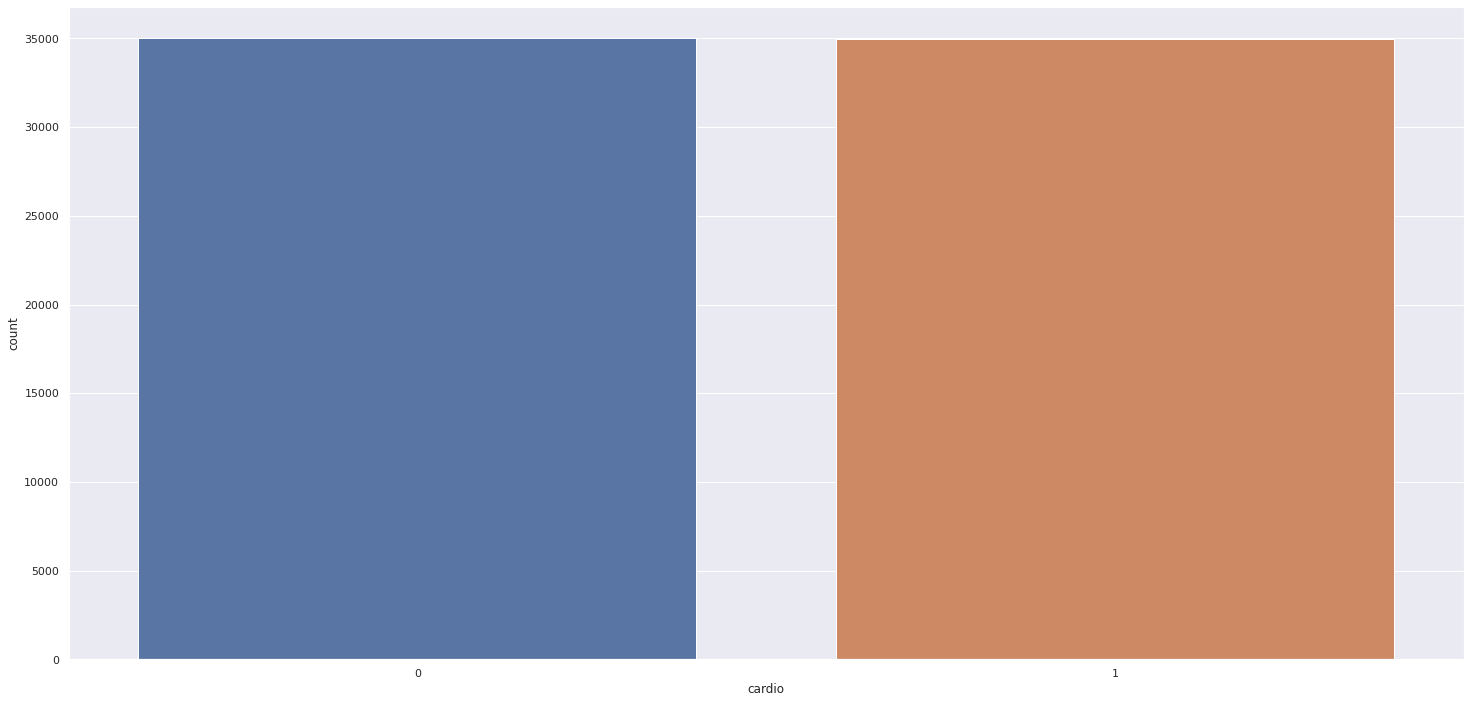

In [96]:
bar = sns.countplot(data=df2, x='cardio', saturation=0.75)

In [97]:
print(df2['cardio'].value_counts(normalize=True))

0    0.5003
1    0.4997
Name: cardio, dtype: float64


* 50% to the each response
* The variable response is balanced;



#### 2.4.2.1. Visualizing Outliers

##### height x weight

<AxesSubplot:xlabel='weight', ylabel='Density'>

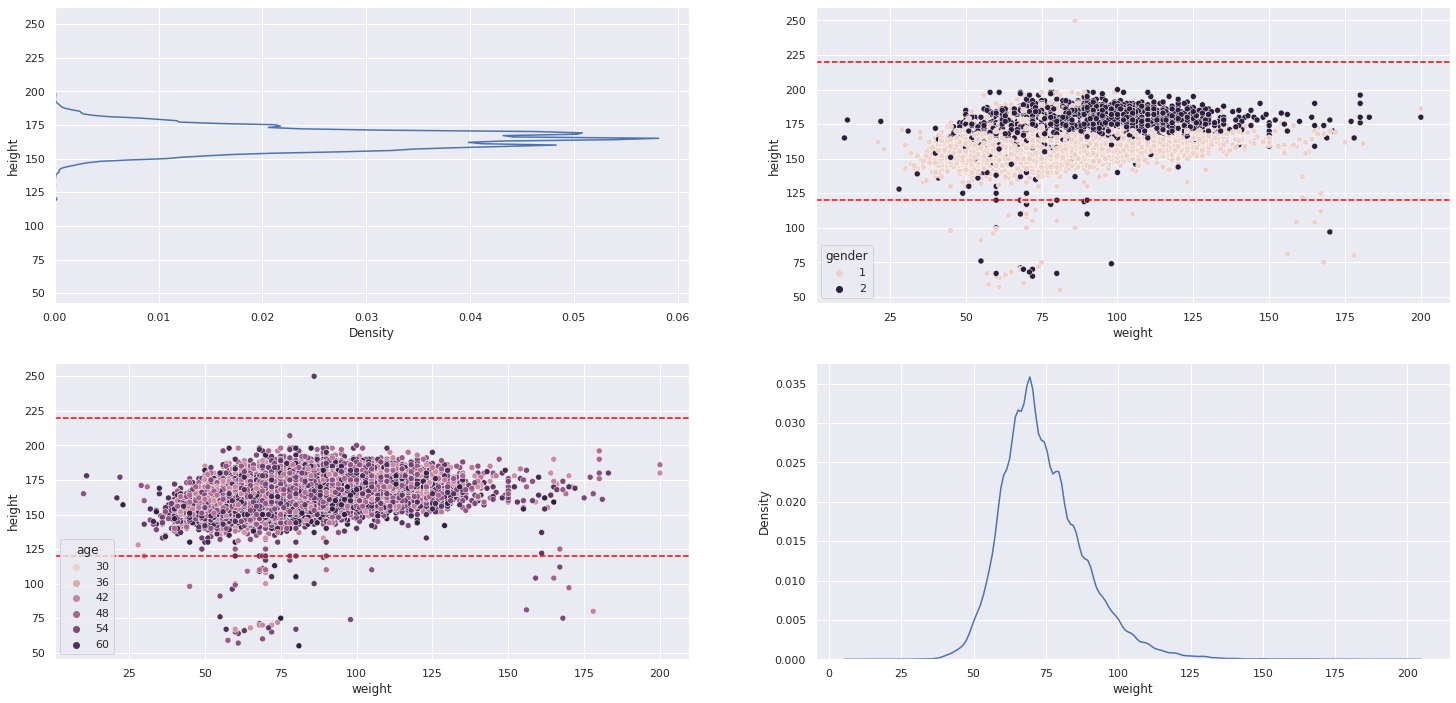

In [765]:
plt.subplot(2, 2, 1)
sns.kdeplot(y='height', data=df2)

plt.subplot(2, 2, 2)
sns.scatterplot(x='weight', y='height', hue='gender', data=df2)
plt.axhline(y=220, color='red', linestyle='--')
plt.axhline(y=120, color='red', linestyle='--')


plt.subplot(2, 2, 3)
sns.scatterplot(x='weight', y='height', hue='age', data=df2)
plt.axhline(y=220, color='red', linestyle='--')
plt.axhline(y=120, color='red', linestyle='--')

plt.subplot(2, 2, 4)
sns.kdeplot(x='weight', data=df2)

height > 220 -> Exclude
height < 100 -> Exclude

In [766]:
out_h_tall = df2[df2['height'] >= 220]
out_h_short = df2[df2['height'] <= 120]

df2 = df2.drop(out_h_tall.index, axis=0).copy()
df2 = df2.drop(out_h_short.index, axis=0).copy()

##### BMI

In [767]:
df2['bmi'] = df2['weight'] / (df2['height']/100)**2

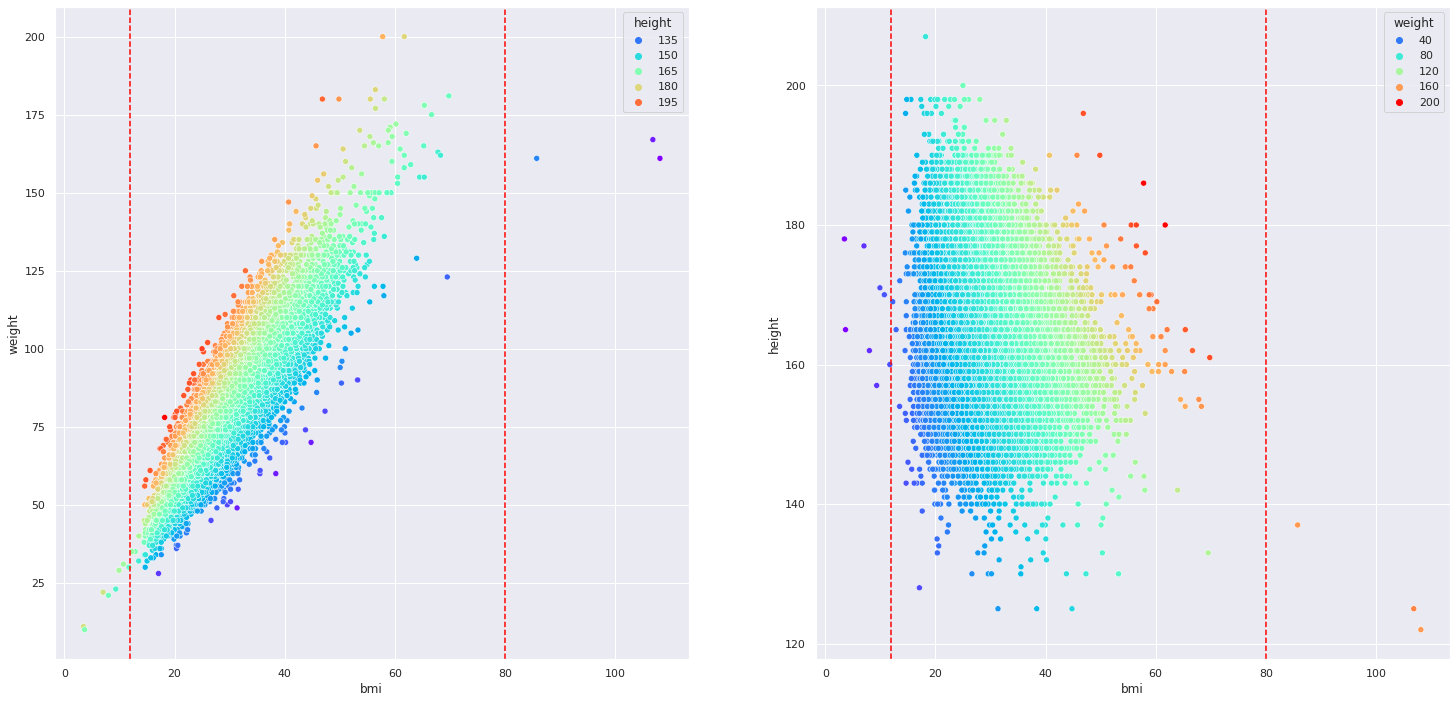

In [768]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='bmi', y='weight', hue='height', palette='rainbow', data=df2)
plt.axvline(x=12, color='red', linestyle='--')
plt.axvline(x=80, color='red', linestyle='--')

plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='height', hue='weight', palette='rainbow', data=df2)
plt.axvline(x=12, color='red', linestyle='--')
plt.axvline(x=80, color='red', linestyle='--')

bmi > 80 

bmi < 12

In [769]:
low_bmi = df2[df2['bmi'] < 12]
high_bmi = df2[df2['bmi'] > 80]

df2 = df2.drop(low_bmi.index, axis=0).copy()
df2 = df2.drop(high_bmi.index, axis=0).copy()

In [770]:
df2.shape

(69902, 13)

##### ap_hi x ap_lo

In [771]:
# pre filtering -> filtering values without sense
df2 = df2.drop(df2[(df2['ap_hi'] > 250) | (df2['ap_hi'] < 0)].index)
df2 = df2.drop(df2[(df2['ap_lo'] > 150) | (df2['ap_lo'] < 0)].index)

<AxesSubplot:ylabel='ap_lo'>

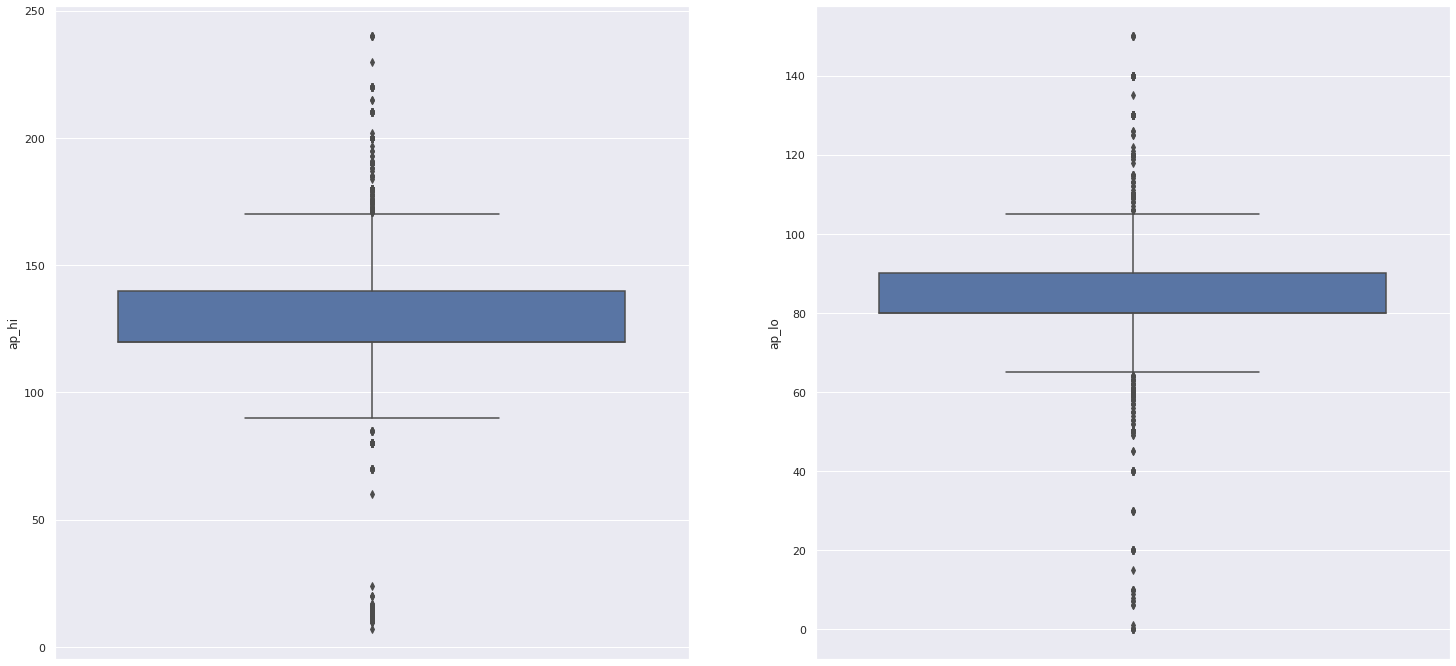

In [772]:
plt.subplot(1, 2, 1)
sns.boxplot(y='ap_hi', data=df2)

plt.subplot(1, 2, 2)
sns.boxplot(y='ap_lo', data=df2)

In [773]:
high_outlier_hi = df2['ap_hi'].quantile([0.75]) + (df2['ap_hi'].quantile([0.75]).values - df2['ap_hi'].quantile([0.25]).values) * 1.5
low_outlier_hi = df2['ap_hi'].quantile([0.25]) - (df2['ap_hi'].quantile([0.75]).values - df2['ap_hi'].quantile([0.25]).values) * 1.5

high_outlier_lo = df2['ap_lo'].quantile([0.75]) + (df2['ap_lo'].quantile([0.75]).values - df2['ap_lo'].quantile([0.25]).values) * 1.5
low_outlier_lo = df2['ap_lo'].quantile([0.25]) - (df2['ap_lo'].quantile([0.75]).values - df2['ap_lo'].quantile([0.25]).values) * 1.5

print('High outliers from systolic: {}'.format(high_outlier_hi.values[0]))
print('Low outliers from systolic: {}'.format(low_outlier_hi.values[0]))

print()

print('High outliers from diastolic: {}'.format(high_outlier_lo.values[0]))
print('Low outliers from diastolic: {}'.format(low_outlier_lo.values[0]))

High outliers from systolic: 170.0
Low outliers from systolic: 90.0

High outliers from diastolic: 105.0
Low outliers from diastolic: 65.0


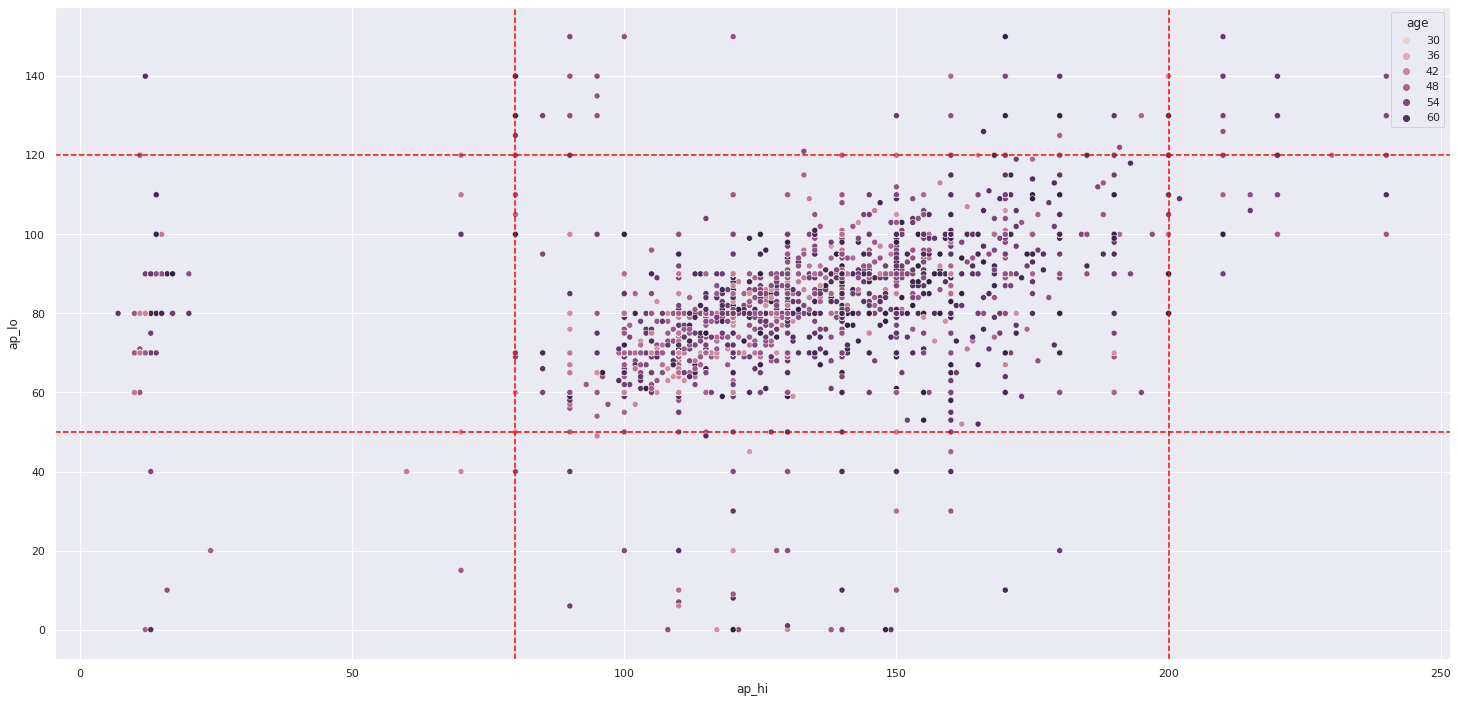

In [774]:
sns.scatterplot(x='ap_hi', y='ap_lo', hue='age', data=df2)
plt.axvline(x=200, color='red', linestyle='--')
plt.axvline(x=80, color='red', linestyle='--')
plt.axhline(y=120, color='red', linestyle='--')
plt.axhline(y=50, color='red', linestyle='--')

In [775]:
pressure_drop = df2[(df2['ap_hi'] >= 200) | (df2['ap_hi'] <= 80) | (df2['ap_lo'] >= 120) | (df2['ap_lo'] <= 50)]

df2 = df2.drop(diastolic_drop.index, axis=0).copy()

In [785]:
percentage = ((-df2.shape[0] + 70000) / 70000) * 100
print('Data Percentage Drop: {:.2f}%'.format(percentage))

Data Percentage Drop: 2.22%
